In [ ]:
# www.kaggle.com/c/dogs-vs-cats/data

In [ ]:
# Copying images to training, validation, and test directories

In [1]:
import os, shutil

In [15]:
original_dataset_dir = r'c:\Download\catsdogs\train'

In [3]:
base_dir = 'c:\Download\catsdogs\cats_and_dogs_small'

In [4]:
os.mkdir(base_dir)

In [5]:
# Directory for Training
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

In [6]:
# Directory for Validation
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [7]:
# Directory for Testing
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [8]:
# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [9]:
# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [10]:
# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

In [11]:
# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [12]:
# Directory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

In [13]:
# Directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [ ]:
# Copies the first 1,000 cat images to train_cats_dir

In [16]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [17]:
# Copies the next 500 cat images to validation_cats_dir

In [18]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [19]:
# Copies the next 500 cat images to test_cats_dir

In [20]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [21]:
# Copies the first 1,000 dog images to train_dogs_dir

In [22]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [23]:
# Copies the next 500 dog images to validation_dogs_dir

In [24]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [25]:
# Copies the next 500 dog images to test_dogs_dir

In [26]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [27]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [ ]:
# Using ImageDataGenerator to read images from directories

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
# Rescales all images by 1/255

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
train_generator = train_datagen.flow_from_directory( train_dir,
                                                     target_size=(150, 150),
                                                     batch_size=20,
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [32]:
# Resize all the images to 150 * 150
# class_mode='binary' becoz you use binary_crossentropy loss, you need binary labels.

In [33]:
validation_generator = test_datagen.flow_from_directory( validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [34]:
# these generators: it yields batches of 150 × 150 RGB
# images (shape (20, 150, 150, 3)) and binary labels (shape (20,)).

In [35]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [36]:
# Instantiating a small convnet for dogs vs. cats classification

In [37]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [38]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [40]:
# Configuring the model for training

In [41]:
from tensorflow.keras import optimizers

In [42]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [43]:
# Fitting the model using a batch generator

In [44]:
history = model.fit_generator( train_generator,
                               steps_per_epoch=100,
                               epochs=30,
                               validation_data=validation_generator,
                               validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 98s 979ms/step - loss: 0.6895 - accuracy: 0.5360 - val_loss: 0.6903 - val_accuracy: 0.5380
Epoch 2/30
100/100 [==============================] - 14s 137ms/step - loss: 0.6570 - accuracy: 0.6090 - val_loss: 0.6385 - val_accuracy: 0.6340
Epoch 3/30
100/100 [==============================] - 13s 126ms/step - loss: 0.6049 - accuracy: 0.6765 - val_loss: 0.6272 - val_accuracy: 0.6300
Epoch 4/30
100/100 [==============================] - 13s 128ms/step - loss: 0.5654 - accuracy: 0.7000 - val_loss: 0.5888 - val_accuracy: 0.6820
Epoch 5/30
100/100 [==============================] - 13s 129ms/step - loss: 0.5351 - accuracy: 0.7350 - val_loss: 0.5737 - val_accuracy: 0.6990 ac
Epoch 6/30
100/100 [==============================] - 13s 132ms/step - loss: 0.5056 - accuracy: 0.7515 - val_loss: 0.5815 - val_accuracy: 0.6820
Epoch 7/30
100/100 [==============================]

In [45]:
# Saving the model

model.save('cats_and_dogs_small_1.h5')

In [46]:
# Displaying curves of loss and accuracy during training

In [47]:
import matplotlib.pyplot as plt

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [49]:
epochs = range(1, len(acc) + 1)

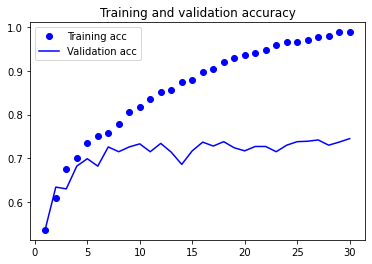

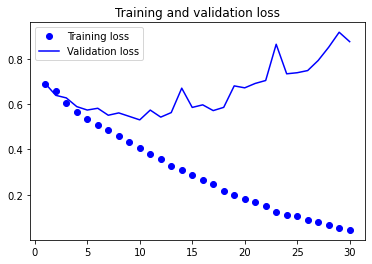

In [50]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Setting up a data augmentation configuration via ImageDataGenerator

In [51]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [52]:
# Displaying some randomly augmented training images

In [53]:
from tensorflow.keras.preprocessing import image

In [54]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [55]:
# Choose Image to augment
img_path = fnames[3]

In [56]:
# Read an Image and resize it
img = image.load_img(img_path, target_size=(150, 150))

In [57]:
# Converts it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

In [58]:
# Reshapes it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

In [59]:
# Generates batches of randomly transformed images. Loops indefinitely, so you need to break the
# loop at some point!

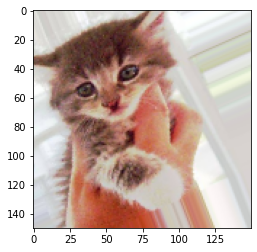

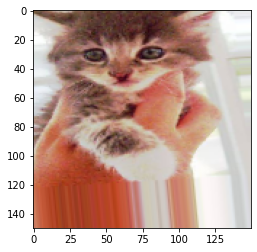

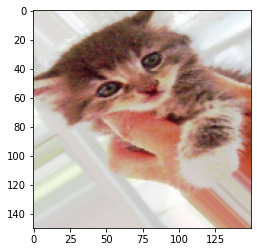

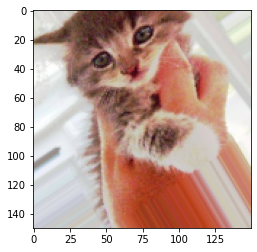

In [60]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()        

In [ ]:
# To further fight overfitting, you’ll also add a Dropout layer to your model, 
# right before the densely connected classifier

In [61]:
# Defining a new convnet that includes dropout

In [62]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [63]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [64]:
# Training the convnet using data-augmentation generators

In [65]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

In [66]:
# validation data should not be augmented

In [67]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [71]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [72]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [73]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 33s 326ms/step - loss: 0.6919 - accuracy: 0.5205 - val_loss: 0.6809 - val_accuracy: 0.5170
Epoch 2/100
100/100 [==============================] - 15s 150ms/step - loss: 0.6833 - accuracy: 0.5575 - val_loss: 0.6783 - val_accuracy: 0.5400
Epoch 3/100
100/100 [==============================] - 15s 149ms/step - loss: 0.6758 - accuracy: 0.5740 - val_loss: 0.6929 - val_accuracy: 0.5450
Epoch 4/100
100/100 [==============================] - 15s 149ms/step - loss: 0.6618 - accuracy: 0.6160 - val_loss: 0.6366 - val_accuracy: 0.6350
Epoch 5/100
100/100 [==============================] - 15s 146ms/step - loss: 0.6539 - accuracy: 0.6150 - val_loss: 0.6350 - val_accuracy: 0.6360
Epoch 6/100
100/100 [==============================] - 15s 146ms/step - loss: 0.6435 - accuracy: 0.6280 - val_loss: 0.6143 - val_accuracy: 0.6690
Epoch 7/100
100/100 [==============================] - 14s 145ms/step - loss: 0.6294 - accuracy: 0.6520 - val_loss: 0.6027 -

Epoch 57/100
100/100 [==============================] - 15s 147ms/step - loss: 0.4599 - accuracy: 0.7835 - val_loss: 0.4424 - val_accuracy: 0.8000
Epoch 58/100
100/100 [==============================] - 15s 149ms/step - loss: 0.4552 - accuracy: 0.7770 - val_loss: 0.6193 - val_accuracy: 0.7070
Epoch 59/100
100/100 [==============================] - 15s 149ms/step - loss: 0.4633 - accuracy: 0.7815 - val_loss: 0.5093 - val_accuracy: 0.7660
Epoch 60/100
100/100 [==============================] - 15s 147ms/step - loss: 0.4680 - accuracy: 0.7850 - val_loss: 0.4913 - val_accuracy: 0.7680
Epoch 61/100
100/100 [==============================] - 15s 149ms/step - loss: 0.4595 - accuracy: 0.7885 - val_loss: 0.4611 - val_accuracy: 0.7770
Epoch 62/100
100/100 [==============================] - 15s 149ms/step - loss: 0.4566 - accuracy: 0.7825 - val_loss: 0.4292 - val_accuracy: 0.8050
Epoch 63/100
100/100 [==============================] - 15s 148ms/step - loss: 0.4461 - accuracy: 0.7860 - val_loss: 0

In [74]:
# Saving the model

In [75]:
model.save('cats_and_dogs_small_2.h5')

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [77]:
epochs = range(1, len(acc) + 1)

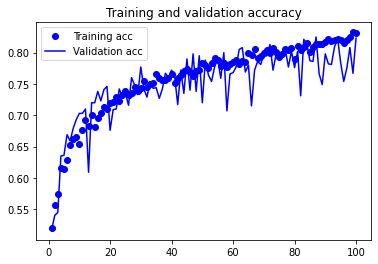

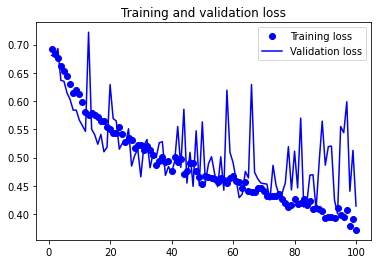

In [78]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()